In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [92]:
#looking at processed data files
ddir = '/global/cfs/projectdirs/dune/www/data/2x2/nearline/flowed_charge/beam/ramp/'
fname = 'packet-ramp-2024_06_11_16_25_21_CDT.FLOW.hdf5'

In [93]:
import os

In [94]:
f=h5py.File(ddir+fname)

In [95]:
f.keys()

<KeysViewHDF5 ['_header', 'configs', 'daq_configs', 'messages', 'packets']>

In [75]:
f['charge/packets/data'].dtype.names

('io_group',
 'io_channel',
 'chip_id',
 'packet_type',
 'downstream_marker',
 'parity',
 'valid_parity',
 'channel_id',
 'timestamp',
 'dataword',
 'trigger_type',
 'local_fifo',
 'shared_fifo',
 'register_address',
 'register_data',
 'direction',
 'local_fifo_events',
 'shared_fifo_events',
 'counter',
 'fifo_diagnostics_enabled',
 'first_packet',
 'receipt_timestamp')

In [76]:
packets = f['charge/packets/data'][:]

In [77]:
packets['io_group'].shape

(11787101,)

In [78]:
packets['io_group']==6

array([ True,  True,  True, ..., False, False,  True])

In [79]:
(packets['io_group']==6).shape

(11787101,)

In [80]:
arr = np.array( [1, 2, 3, 4, 5, 6] )

In [81]:
arr[ np.array([True, True, False, True, False, False])  ]

array([1, 2, 4])

In [82]:
packets_iog_1 = packets[packets['io_group']==1]

In [83]:
packets_iog_1['packet_type']

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [84]:
# packet type = 0 --> data packet
# packet type = 6 --> 'sync packets'

In [85]:
syncs = packets_iog_1[packets_iog_1['packet_type']==6]

In [86]:
syncs.shape

(56,)

In [87]:
for io_group in range(1,9):
    p = packets[packets['io_group']==io_group]
    syncs = p[p['packet_type']==6]
    print(io_group, ':', syncs.shape)

1 : (56,)
2 : (57,)
3 : (57,)
4 : (57,)
5 : (56,)
6 : (57,)
7 : (57,)
8 : (56,)


(array([1.1786691e+07, 4.1000000e+02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]),
 array([0.e+00, 1.e+07, 2.e+07, 3.e+07, 4.e+07, 5.e+07, 6.e+07, 7.e+07,
        8.e+07, 9.e+07, 1.e+08]),
 <BarContainer object of 10 artists>)

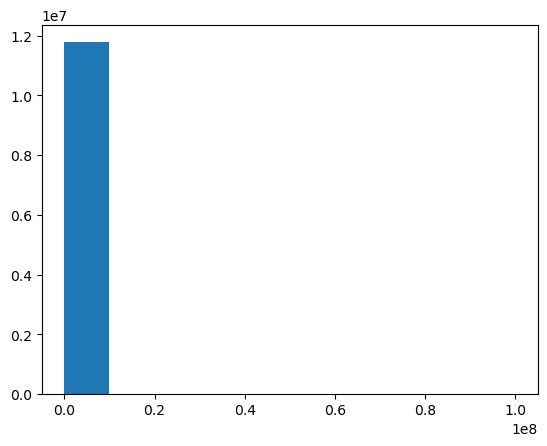

In [88]:
plt.hist(packets['timestamp'], bins=10, range=(0, 1e8))

In [141]:
# looking at raw data files
ddir = '/global/cfs/projectdirs/dune/www/data/2x2/nearline/packet/beam/ramp/'
fname = 'packet-ramp-2024_06_11_14_00_19_CDT.h5'

In [142]:
f=h5py.File(ddir+fname)

In [143]:
packets = f['packets'][:]

In [144]:
for io_group in range(1,9):
    p = packets[packets['io_group']==io_group]
    syncs = p[p['packet_type']==6]
    print(io_group, ':', syncs.shape)

1 : (329,)
2 : (328,)
3 : (329,)
4 : (328,)
5 : (329,)
6 : (329,)
7 : (329,)
8 : (329,)


In [151]:
p = packets[packets['io_group']==2]
p=p[ np.logical_or(p['packet_type']==0, p['packet_type']==6) ]

In [152]:
sync_mask = p['packet_type']==6

In [153]:
sync_indices = np.argwhere(sync_mask==True).flatten()

In [154]:
packets_per_sync = np.diff(sync_indices) # get number of packets between sync pulses

In [155]:
# each entry above is 1 second worth of data packets, group these into 10 second bunches

bunches = np.zeros(33)

for i in range(len(packets_per_sync)):
    bunches[ i//10 ] += packets_per_sync[i]

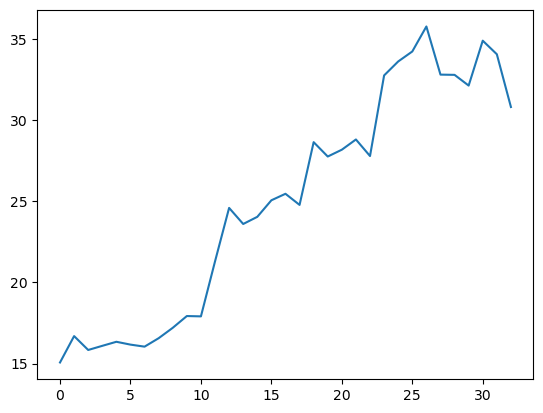

In [159]:
plt.plot(bunches/200)

In [128]:
set(packets['packet_type'])

{0, 1, 3, 4, 6, 7}

In [129]:
# packet type
# 0 --> data packets
# 1/3 --> read/write
# 4 --> timestamp
# 6 --> sync packets
# 7 --> trigger packet